<a href="https://colab.research.google.com/github/dxda6216/q10/blob/main/circadian_period_q10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Circadian period Q<sub>10</sub> calculator

For usage, please take a look at:
[https://github.com/dxda6216/q10](https://github.com/dxda6216/q10)


Temperature =  [33.4 33.4 34.3 34.3 35.2 35.2 35.8 35.8 36.3 36.3 36.9 36.9 37.8 37.8
 38.6 33.4 33.4 34.3 34.3 35.2 35.2 35.8 35.8 36.3 36.3 36.9 36.9 37.8
 37.8 38.6 38.6 39.1 39.1 40.4 40.4]
Period =  [37.07 38.06 37.78 35.2  32.84 33.98 33.61 32.75 32.43 31.95 35.   31.92
 35.8  30.71 30.69 37.47 37.46 35.1  35.77 33.91 34.16 32.73 33.35 33.12
 32.95 34.29 32.13 33.11 30.55 26.45 31.72 33.43 28.52 31.1  27.36] 

Tau37 (estimated period length at 37°C) = 32.502 ± 0.296
Q10 (temperature coefficient) = 1.413 ± 0.062
R² = 0.657318 

Dataset
Temp (°C)	Period (hours)
33.4	37.07
33.4	38.06
34.3	37.78
34.3	35.2
35.2	32.84
35.2	33.98
35.8	33.61
35.8	32.75
36.3	32.43
36.3	31.95
36.9	35.0
36.9	31.92
37.8	35.8
37.8	30.71
38.6	30.69
33.4	37.47
33.4	37.46
34.3	35.1
34.3	35.77
35.2	33.91
35.2	34.16
35.8	32.73
35.8	33.35
36.3	33.12
36.3	32.95
36.9	34.29
36.9	32.13
37.8	33.11
37.8	30.55
38.6	26.45
38.6	31.72
39.1	33.43
39.1	28.52
40.4	31.1
40.4	27.36

Fitted Curve
Temp (°C)	Period (hours)
10.0	82.6

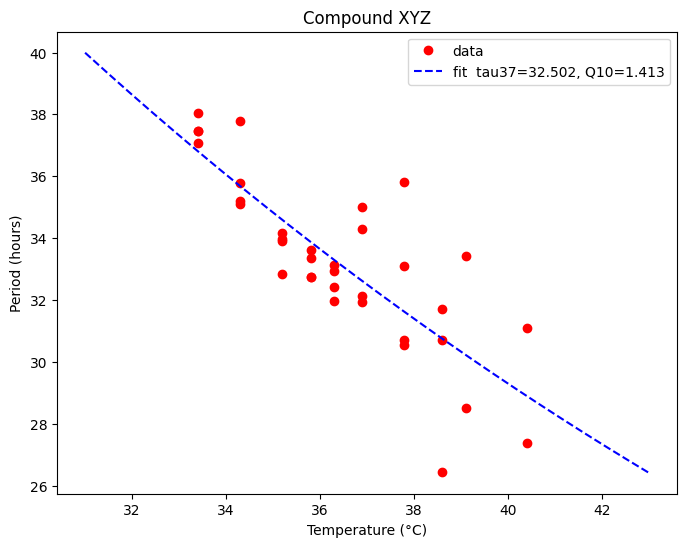

In [13]:
### This is a simple script to calculate Q10 values for circadian period
### length by using SciPy Optimize non-linear least squares fit on Colab.
### Copyright (c) 2022 by dxda6216 (dxda6216 AT gmail DOT com)
###
#@title Q10 calculator
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

#@markdown Input data, then hit **Runtime** -> **Run all** (or press **Ctrl+F9**).
# Data description (plot title)
Data_description = "Compound XYZ" #@param {type:"string"}

# Temperature data
Temperatures = 33.4, 33.4, 34.3, 34.3, 35.2, 35.2, 35.8, 35.8, 36.3, 36.3, 36.9, 36.9, 37.8, 37.8, 38.6, 33.4, 33.4, 34.3, 34.3, 35.2, 35.2, 35.8, 35.8, 36.3, 36.3, 36.9, 36.9, 37.8, 37.8, 38.6, 38.6, 39.1, 39.1, 40.4, 40.4 #@param {type:"raw"}
x = np.array(Temperatures)

# Period data
Periods =  37.070, 38.060, 37.780, 35.200, 32.840, 33.980, 33.610, 32.750, 32.430, 31.950, 35.000, 31.920, 35.800, 30.710, 30.690, 37.470, 37.460, 35.100, 35.770, 33.910, 34.160, 32.730, 33.350, 33.120, 32.950, 34.290, 32.130, 33.110, 30.550, 26.450, 31.720, 33.430, 28.520, 31.100, 27.360 #@param {type:"raw"}
y = np.array(Periods)

# Printing the data
print('Temperature = ', x)
print('Period = ', y, '\n')

# Figure Settings ON of OFF
Set_graphical_parameters_of_figure = "No (Graph axes, tick marks, etc will automatically be adjusted)" #@param ["No (Graph axes, tick marks, etc will automatically be adjusted)", "Yes (Set the parameters)"]

# Figure graphical_parameter settings
# psx[0] : figure size - width
# psx[1] : figure size - height
# psx[2] : X-axis scale - min
# psx[3] : X-axis scale - max
# psx[4] : X-axis ticks - starting
# psx[5] : X-axis ticks - ending
# psx[6] : X-axis ticks - interval
# psx[7] : Y-axis scale - min
# psx[8] : Y-axis scale - max
# psx[9] : Y-axis ticks - starting
# psx[10] : Y-axis ticks - ending
# psx[11] : Y-axis ticks - interval
# psx[12] : Fitted curve - starting
# psx[13] : Fitted curve - ending
Figure_graphical_parameters =  8, 6, 27, 45, 28, 45, 2, 14, 45, 14, 45, 2, 28, 43 #@param {type:"raw"}
psx = np.array(Figure_graphical_parameters)

# Displaying Tab-delimited data Yes or No
Display_tab_delimited_data = "No" #@param ["No", "Yes"]

# Defining an equation for curve fitting
# fitting parameters:
#     tau37 : period at 37 degree Celsius
#     q10 : temperature coefficient (Q10)
def func(x, tau37, q10):
	return tau37 / ( q10 ** ( ( x - 37 ) * 0.1 ) )

# Initial values for the fitting parameters
p0 = np.array([24.000, 1.000])

# Fitting the data to the defined equation
popt, pcov = curve_fit(func, x, y, p0)

residuals = y - func(x, *popt)
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y-np.mean(y))**2)
r_squared = 1 - ( ss_residuals / ss_total )

# Printing the results
print(u'Tau37 (estimated period length at 37\u00B0C) =', '{:.3f}'.format(popt[0]), u'\u00B1', '{:.3f}'.format(pcov[0,0]**0.5))
print(u'Q10 (temperature coefficient) =', '{:.3f}'.format(popt[1]), u'\u00B1', '{:.3f}'.format(pcov[1,1]**0.5))
print(u'R\u00B2 =', '{:.6f}'.format(r_squared), u'\n')


# Plotting data and fitted curve
if Set_graphical_parameters_of_figure == "Yes (Set the parameters)":
	fig = plt.figure(figsize = (psx[0],psx[1]))
	fcx = np.linspace(psx[12], psx[13], 200)
	if psx[4] < psx[2]:
		psx[4] = psx[2]
	if psx[5] >= psx[3]:
		psx[5] = psx[3] + 1
	if psx[9] < psx[7]:
		psx[9] = psx[7]
	if psx[10] >= psx[8]:
		psx[10] = psx[8] + 1
	plt.xlim(psx[2], psx[3])
	plt.ylim(psx[7], psx[8])
	plt.xticks(np.arange(psx[4], psx[5], psx[6]))
	plt.yticks(np.arange(psx[9], psx[10], psx[11]))
else:
	fig = plt.figure(figsize = (8,6))
	fcxmin = int( min(x) - ( max(x) - min(x) ) * 0.250 )
	fcxmax = int( max(x) + ( max(x) - min(x) ) * 0.250 ) + 1
	fcx = np.linspace(fcxmin, fcxmax, 200)

plt.plot(x, y, 'o', color ='red', label ='data')
fcy = func(fcx, popt[0], popt[1])
plt.plot(fcx, fcy, '--', color='blue', label ='fit  tau37=%5.3f, Q10=%5.3f' % tuple(popt))
plt.title(Data_description)
plt.xlabel(u'Temperature (\u00B0C)')
plt.ylabel('Period (hours)')

#if Display_tab_delimited_data == "Yes":
#	print(u'Dataset')
#	print (u'Temp (\u00B0C)\tPeriod (hours)')
#	ycount = 0
#	for xseq in x:
#		print(str(xseq)+'\t'+str(y[ycount]))
#		ycount += 1
#	print(u'\nFitted Curve')
#	print (u'Temp (\u00B0C)\tPeriod (hours)')
#	fcycount = 0
#	for fcxseq in fcx:
#		print('{:.3f}'.format(fcxseq)+'\t'+'{:.3f}'.format(fcy[fcycount]))
#		fcycount += 1
#	print(u'\n')

if Display_tab_delimited_data == "Yes":
	fix = np.array(range(100, 501, 1))
	flx = fix / 10
	fly = func(flx, popt[0], popt[1])
	print(u'Dataset')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	ycount = 0
	for xseq in x:
		print(str(xseq)+'\t'+str(y[ycount]))
		ycount += 1
	print(u'\nFitted Curve')
	print (u'Temp (\u00B0C)\tPeriod (hours)')
	fcycount = 0
	for flxseq in flx:
		print('{:.1f}'.format(flx[fcycount])+'\t'+'{:.3f}'.format(fly[fcycount]))
		fcycount += 1
	print(u'\n')

plt.legend()
plt.show()

### End of script